<a href="https://colab.research.google.com/github/Jia-Yu-Yu/pycs4001/blob/main/project2_%E6%B8%B8%E4%BD%B3%E8%AB%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/pycs4001_project02/spaceship-titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/pycs4001_project02/spaceship-titanic/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
# Checking for missing values
value_list = ['HomePlanet', 'Destination', 'VIP', 'Transported', 'CryoSleep', 'Age']

for i in value_list:
    print(train[i].value_counts())
    print(f'Missing: {train[i].isna().sum()}')
    print('------'*6)
print(train['Cabin'].str[0].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
Missing: 201
------------------------------------
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
Missing: 182
------------------------------------
False    8291
True      199
Name: VIP, dtype: int64
Missing: 203
------------------------------------
True     4378
False    4315
Name: Transported, dtype: int64
Missing: 0
------------------------------------
False    5439
True     3037
Name: CryoSleep, dtype: int64
Missing: 217
------------------------------------
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64
Missing: 179
------------------------------------
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin, dtype: int64


In [4]:
#Filling the NaN values with the mode value.
#Age filled with median value.
for i in train.columns:
    if i == 'Age':
        fill = train[i].mean()
    else:
        fill = train[i].value_counts().index[0]
    train[i] = train[i].fillna(fill)  
    
for i in test.columns:
    if i == 'Age':
        fill = test[i].mean()
    else:
        fill = test[i].value_counts().index[0] 
    test[i] = test[i].fillna(fill) 
    

In [5]:
# Splitting 'Cabin' into three new attributes; 'Deck', 'Num', and 'Side'
index = 0
Deck = []
Num = []
Side = []

for i in train['Cabin']:
    Deck.append(i.split('/')[0])
    Num.append(i.split('/')[1])
    Side.append(i.split('/')[2])
    index += 1
train['Deck'], train['Num'], train['Side'] = [Deck, Num, Side] 

In [6]:
index = 0
Deck = []
Num = []
Side = []

for i in test['Cabin']:
    Deck.append(i.split('/')[0])
    Num.append(i.split('/')[1])
    Side.append(i.split('/')[2])
    index += 1
test['Deck'], test['Num'], test['Side'] = [Deck, Num, Side] 

In [7]:
# Breaking ages into Groups
def age_group(s):
    if s == 0:
        return -1
    elif (s > 0) & (s <= 11):
        return 1
    elif (s > 11) & (s <= 22):
        return 2
    elif (s > 22) & (s <= 33):
        return 3
    elif (s > 33) & (s <= 45):
        return 4
    elif (s > 45) & (s <= 56):
        return 5
    elif (s > 56) & (s <= 67):
        return 6
    elif (s > 67) & (s <= 79):
        return 7
    elif (s > 79) & (s <= 80):
        return 8
    
train['Age_Group'] = train['Age'].apply(age_group)
test['Age_Group'] = test['Age'].apply(age_group)

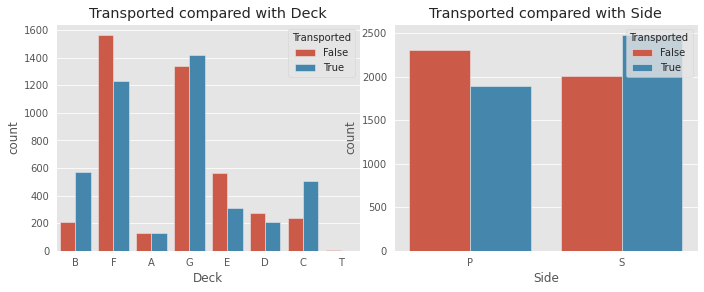

In [8]:
col_list = ['Deck', 'Side']
plt.figure(figsize = (10, 15))
sns.set_style('darkgrid')
for index, i in enumerate(col_list):
    with plt.style.context("ggplot"):
        plt.subplot(4, 2,index+1)
        plt.tight_layout()
        plt.title(f"Transported compared with {i}")
        sns.countplot(i, hue = 'Transported', data = train)

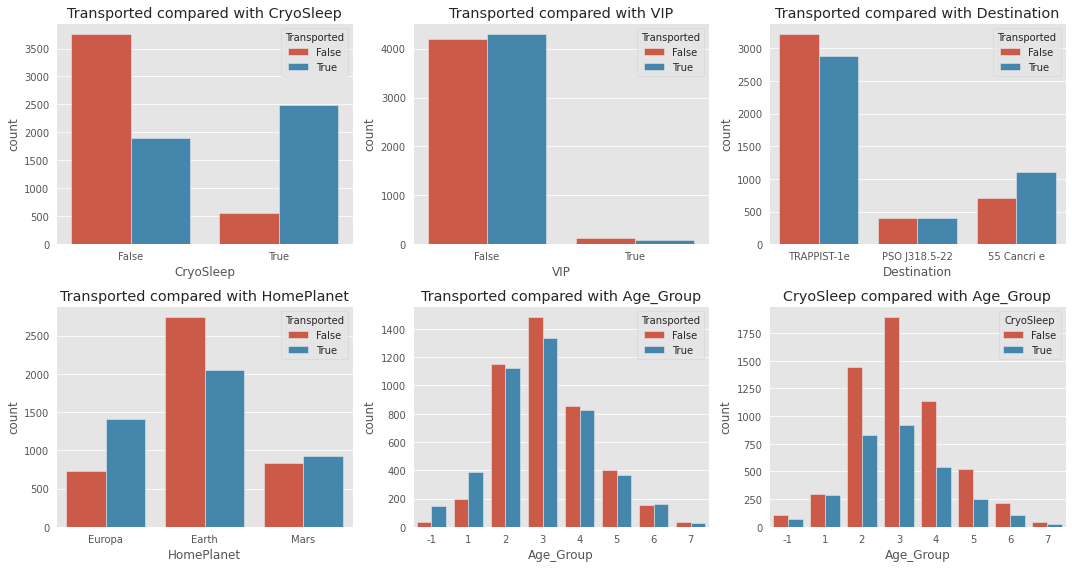

In [9]:
list = ['CryoSleep', 'VIP', 'Destination','HomePlanet', 'Age_Group']
plt.figure(figsize = (15, 8))
sns.set_style('darkgrid')
for index, i in enumerate(list):
    with plt.style.context("ggplot"):
        plt.subplot(2, 3,index+1)
        plt.tight_layout()
        plt.title(f"Transported compared with {i}")
        sns.countplot(i, hue = 'Transported', data = train)
with plt.style.context("ggplot"):
    plt.subplot(2, 3, 6)
    plt.title(f"CryoSleep compared with Age_Group")
    sns.countplot('Age_Group', hue = 'CryoSleep', data = train)

In [10]:
corr = train.corr()
corr.style.background_gradient(cmap='seismic')

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Group
CryoSleep,1.000000,-0.070736,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132,-0.058800
Age,-0.070736,1.000000,0.091574,0.068425,0.127343,0.032846,0.121071,0.099551,-0.074249,0.966617
VIP,-0.078281,0.091574,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261,0.089742
RoomService,-0.244089,0.068425,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,0.067227
FoodCourt,-0.205928,0.127343,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,0.124859
ShoppingMall,-0.207798,0.032846,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,0.036838
Spa,-0.198307,0.121071,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,0.113450
VRDeck,-0.192721,0.099551,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,0.099748
Transported,0.460132,-0.074249,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,-0.075477
Age_Group,-0.058800,0.966617,0.089742,0.067227,0.124859,0.036838,0.113450,0.099748,-0.075477,1.000000


In [11]:
features_cat = ['HomePlanet', 'Destination', 'Deck', 'Side']
for feature in features_cat:
    train[pd.get_dummies(train[feature], prefix=feature).columns] = pd.get_dummies(train[feature], prefix=feature)
    test[pd.get_dummies(test[feature], prefix=feature).columns] = pd.get_dummies(test[feature], prefix=feature)

In [12]:
train_dropped = train.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Age',
       'Name', 'Deck', 'Num', 'Side'], axis = 1)
test_dropped = test.drop(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Age',
       'Name', 'Deck', 'Num', 'Side'], axis = 1)

In [13]:
numeric_var = ['CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Age_Group', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S']

In [14]:
y = train_dropped['Transported']
X = train_dropped[numeric_var]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [16]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 6954
X_test: 1739
y_train: 6954
y_test: 1739


In [17]:
random_forest = RandomForestClassifier(random_state = 1)

In [18]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [19]:
y_pred = random_forest.predict(X_test)

In [20]:
print(f'random forest accuracy score is {accuracy_score(y_test, y_pred)}')

random forest accuracy score is 0.8050603795284647


In [21]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print(f'Cross val score for Random Forest: {scores.mean()}')

Cross val score for Random Forest: 0.7866553717360973


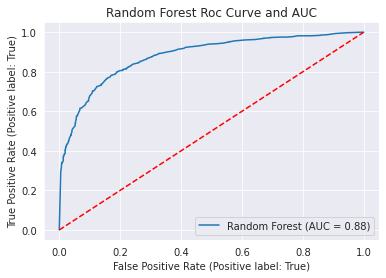

In [22]:
plot_roc_curve(random_forest, X_test, y_test, name = 'Random Forest')
plt.title('Random Forest Roc Curve and AUC')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [23]:
random_forest_new = RandomForestClassifier(random_state = 1)
random_forest_new

RandomForestClassifier(random_state=1)

In [24]:
params = {'n_estimators': [50, 100, 150, 200], 
          'criterion': ['gin1', 'entropy'], 
          'max_features': ['auto', 'sqrt', 'log2'], 
          'bootstrap': [True, False]}

In [25]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = params)

In [26]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gin1', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [27]:
print('best params: ', random_forest_grid.best_params_)

best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [28]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = 'entropy', max_features = 'auto', n_estimators = 100, random_state = 1)

In [29]:
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [30]:
y_pred = random_forest_new2.predict(X_test)

In [31]:
print('the accuracy score of the Random Forest model after hyper param tuning is: ', accuracy_score(y_test, y_pred))

the accuracy score of the Random Forest model after hyper param tuning is:  0.7987349051178838


In [32]:
scores = cross_val_score(random_forest_new2, X_test, y_test, cv = 10)
print(f'Cross val score for Random Forest: {scores.mean()}')

Cross val score for Random Forest: 0.7935552454986381


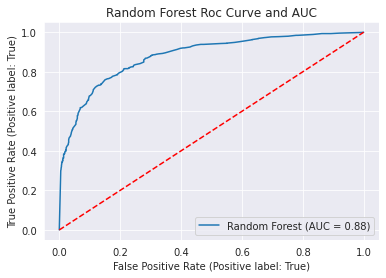

In [33]:
plot_roc_curve(random_forest_new2, X_test, y_test, name = 'Random Forest')
plt.title('Random Forest Roc Curve and AUC')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [34]:
test_dropped['Transported'] = False

In [35]:
X, y = test_dropped[numeric_var], test_dropped['Transported']
random_forest_model = random_forest_new2
y_pred = random_forest_model.predict(X)
y_pred.shape

(4277,)

In [36]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': y_pred})
output.to_csv('submissionb.csv', index = False)